In [529]:
import pandas as pd
import numpy as np
import networkx as nx
import warnings
warnings.filterwarnings('ignore')

In [530]:
cs_ibx_peak = pd.read_csv(r'C:\Users\Gabriel\OneDrive\CUSP\Spring 2022 Classes\ADS\IBX Project\IBXRidership\Network Processing\ctrl_scrs_sta_IBX_peak.csv')
cs_ibx_offpeak = pd.read_csv(r'C:\Users\Gabriel\OneDrive\CUSP\Spring 2022 Classes\ADS\IBX Project\IBXRidership\Network Processing\ctrl_scrs_sta_IBX_offpeak.csv')
cs_noibx_peak = pd.read_csv(r'C:\Users\Gabriel\OneDrive\CUSP\Spring 2022 Classes\ADS\IBX Project\IBXRidership\Network Processing\ctrl_scrs_sta_noIBX_peak.csv')
cs_noibx_offpeak = pd.read_csv(r'C:\Users\Gabriel\OneDrive\CUSP\Spring 2022 Classes\ADS\IBX Project\IBXRidership\Network Processing\ctrl_scrs_sta_noIBX_offpeak.csv')

In [531]:
cs_ibx_peak.rename({'Unnamed: 0':'complex_id'},axis=1,inplace=True)
cs_ibx_offpeak.rename({'Unnamed: 0':'complex_id'},axis=1,inplace=True)
cs_noibx_peak.rename({'Unnamed: 0':'complex_id'},axis=1,inplace=True)
cs_noibx_offpeak.rename({'Unnamed: 0':'complex_id'},axis=1,inplace=True)

In [532]:
#merge the centrality scores together
mg = pd.merge(cs_ibx_peak, cs_ibx_offpeak, on='complex_id',how='left')
mg = pd.merge(mg, cs_noibx_peak, on='complex_id',how='left')
mg = pd.merge(mg, cs_noibx_offpeak, on='complex_id',how='left')
mg.columns = ['Complex_id','cs_ibx_peak','cs_ibx_offpeak','cs_noibx_peak','cs_noibx_offpeak']
mg.head()

,Complex_id,cs_ibx_peak,cs_ibx_offpeak,cs_noibx_peak,cs_noibx_offpeak
0,614c,0.022481,0.013806,0.022649,0.013907
1,611c,0.025420,0.016341,0.025604,0.016466
2,601c,0.024272,0.014947,0.024396,0.015019
3,635c,0.020350,0.012717,0.020454,0.012778
4,620c,0.021319,0.013528,0.021334,0.013548


In [533]:
sts = pd.read_csv(r'C:\Users\Gabriel\OneDrive\CUSP\Spring 2022 Classes\ADS\IBX Project\IBXRidership\Turnstile Data Processing\stations_list.csv')
sts.head()

,Unnamed: 0,Station ID,Complex ID,GTFS Stop ID,Division,Line,Stop Name,Borough,Daytime Routes,Structure,GTFS Latitude,GTFS Longitude,North Direction Label,South Direction Label,ADA,ADA Direction Notes,ADA NB,ADA SB,Capital Outage NB,Capital Outage SB
0,118,119,119,L06,BMT,Canarsie,1 AV,M,L,Subway,40.730953,-73.981628,8 Av,Brooklyn,1,NaN,NaN,NaN,NaN,NaN
1,395,395,395,624,IRT,Lexington Av,103 ST,M,6,Subway,40.790600,-73.947478,Uptown & The Bronx,Downtown,0,NaN,NaN,NaN,NaN,NaN
2,155,156,156,A18,IND,8th Av - Fulton St,103 ST,M,B C,Subway,40.796092,-73.961454,Uptown & The Bronx,Downtown & Brooklyn,0,NaN,NaN,NaN,NaN,NaN
3,309,309,309,119,IRT,Broadway - 7Av,103 ST,M,1,Subway,40.799446,-73.968379,Uptown & The Bronx,Downtown,0,NaN,NaN,NaN,NaN,NaN
4,450,450,450,706,IRT,Flushing,103 ST-CORONA PLAZA,Q,7,Elevated,40.749865,-73.862700,Flushing,Manhattan,0,NaN,NaN,NaN,NaN,NaN


In [534]:
sts['Complex ID'] = sts['Complex ID'].astype(str)

In [535]:
#write a new complex_id column. Keep the old one "Complex_id" (with a capital C) for reference
#merge in the complex ID name based on the GTFS Stop ID. This will return NaNs for the actual complex ids, which currently end in the letter "c"
mg = pd.merge(mg, sts[['Complex ID', 'GTFS Stop ID', 'Station ID']],left_on = 'Complex_id', right_on='GTFS Stop ID',how='left', indicator = True)
mg['complex_id'] = np.where(mg._merge == 'left_only',mg.Complex_id,mg['Complex ID'])

#strip the "c" from the remaining complex ids
mg['complex_id'] = mg['complex_id'].str.strip(to_strip='c')
mg.drop(['Complex ID', 'GTFS Stop ID', 'Station ID','_merge'],axis=1,inplace=True)

In [536]:
mg.head()

,Complex_id,cs_ibx_peak,cs_ibx_offpeak,cs_noibx_peak,cs_noibx_offpeak,complex_id
0,614c,0.022481,0.013806,0.022649,0.013907,614
1,611c,0.025420,0.016341,0.025604,0.016466,611
2,601c,0.024272,0.014947,0.024396,0.015019,601
3,635c,0.020350,0.012717,0.020454,0.012778,635
4,620c,0.021319,0.013528,0.021334,0.013548,620


In [537]:
#bring back in the stop name for easy reference later.
sts_nd = sts.drop_duplicates(subset='Complex ID')
mg = pd.merge(mg,sts_nd[['Complex ID', 'Stop Name']],left_on='complex_id',right_on='Complex ID',how='left')
mg.drop(['Complex ID'],axis=1,inplace=True)
mg = mg[['complex_id', 'Stop Name','Complex_id','cs_ibx_peak', 'cs_ibx_offpeak', 'cs_noibx_peak','cs_noibx_offpeak']]

In [538]:

mg.head()

,complex_id,Stop Name,Complex_id,cs_ibx_peak,cs_ibx_offpeak,cs_noibx_peak,cs_noibx_offpeak
0,614,59 ST-COLUMBUS CIRCLE,614c,0.022481,0.013806,0.022649,0.013907
1,611,42 ST-PORT AUTHORITY BUS TERMINAL,611c,0.025420,0.016341,0.025604,0.016466
2,601,14 ST,601c,0.024272,0.014947,0.024396,0.015019
3,635,SOUTH FERRY,635c,0.020350,0.012717,0.020454,0.012778
4,620,BOROUGH HALL,620c,0.021319,0.013528,0.021334,0.013548


In [539]:
mg.shape

(433, 7)

In [540]:
#mg.to_csv('complex_centralities.csv')

In [541]:
wd_ev = pd.read_csv(r'C:\Users\Gabriel\OneDrive\CUSP\Spring 2022 Classes\ADS\IBX Project\IBXRidership\Turnstile Data Processing\weekday_evening.csv')
wd_mr = pd.read_csv(r'C:\Users\Gabriel\OneDrive\CUSP\Spring 2022 Classes\ADS\IBX Project\IBXRidership\Turnstile Data Processing\weekday_morning.csv')
wd_ov = pd.read_csv(r'C:\Users\Gabriel\OneDrive\CUSP\Spring 2022 Classes\ADS\IBX Project\IBXRidership\Turnstile Data Processing\weekday_overnight.csv')
we_ev = pd.read_csv(r'C:\Users\Gabriel\OneDrive\CUSP\Spring 2022 Classes\ADS\IBX Project\IBXRidership\Turnstile Data Processing\weekend_evening.csv')
we_mr = pd.read_csv(r'C:\Users\Gabriel\OneDrive\CUSP\Spring 2022 Classes\ADS\IBX Project\IBXRidership\Turnstile Data Processing\weekend_morning.csv')
we_ov = pd.read_csv(r'C:\Users\Gabriel\OneDrive\CUSP\Spring 2022 Classes\ADS\IBX Project\IBXRidership\Turnstile Data Processing\weekend_overnight.csv')

In [542]:
wd_ev.shape

(426, 6)

In [543]:
wd_ev['complex_id'] = wd_ev['complex_id'].astype(str)
wd_mr['complex_id'] = wd_mr['complex_id'].astype(str)
wd_ov['complex_id'] = wd_ov['complex_id'].astype(str)
we_ev['complex_id'] = we_ev['complex_id'].astype(str)
we_mr['complex_id'] = we_mr['complex_id'].astype(str)
we_ov['complex_id'] = we_ov['complex_id'].astype(str)

In [544]:
wd_ov.head()

,Unnamed: 0,DOW,TOD,complex_id,avg(entries),avg(exits)
0,0,weekday,overnight,1,238.775,460.675
1,1,weekday,overnight,10,312.525,438.525
2,2,weekday,overnight,100,68.100,183.425
3,3,weekday,overnight,101,280.075,533.175
4,4,weekday,overnight,103,45.800,120.475


In [545]:
we_ov.head()

,Unnamed: 0,DOW,TOD,complex_id,avg(entries),avg(exits)
0,0,weekend,overnight,1,135.3750,618.1250
1,1,weekend,overnight,10,558.5625,648.3125
2,2,weekend,overnight,100,75.7500,276.5625
3,3,weekend,overnight,101,341.5625,755.0625
4,4,weekend,overnight,103,136.0000,214.5625


In [546]:
for d in [wd_ev, wd_mr, wd_ov, we_ev, we_mr, we_ov]:
    n = d.loc[0,'DOW'] + "_" + d.loc[0,'TOD']
    ts_1 = d[['complex_id','avg(exits)','avg(entries)']]
    ts_1.rename({'avg(exits)':f'exits_{n}','avg(entries)':f'entries_{n}'},axis=1,inplace=True)
    mg = pd.merge(mg,ts_1,how='left',left_on='complex_id',right_on='complex_id')

In [547]:
mg.head()

,complex_id,Stop Name,Complex_id,cs_ibx_peak,cs_ibx_offpeak,cs_noibx_peak,cs_noibx_offpeak,exits_weekday_evening,entries_weekday_evening,exits_weekday_morning,entries_weekday_morning,exits_weekday_overnight,entries_weekday_overnight,exits_weekend_evening,entries_weekend_evening,exits_weekend_morning,entries_weekend_morning,exits_weekend_overnight,entries_weekend_overnight
0,614,59 ST-COLUMBUS CIRCLE,614c,0.022481,0.013806,0.022649,0.013907,10926.175,15541.200,25226.700,12127.425,892.400,679.500,9207.0625,8656.6875,13438.0000,6768.7500,992.0000,907.3750
1,611,42 ST-PORT AUTHORITY BUS TERMINAL,611c,0.025420,0.016341,0.025604,0.016466,47538.800,32175.925,51746.825,35712.750,3820.075,4421.525,36982.0625,23756.8125,32989.3125,18093.7500,4894.6875,5036.8750
2,601,14 ST,601c,0.024272,0.014947,0.024396,0.015019,8016.600,8628.425,13483.025,7083.525,697.075,459.025,6736.9375,5749.5000,8523.2500,3904.2500,1071.5000,849.1875
3,635,SOUTH FERRY,635c,0.020350,0.012717,0.020454,0.012778,6610.825,6476.900,8226.100,5440.325,1056.000,509.875,4171.1250,3599.3750,3936.9375,2295.0625,1291.6875,506.0000
4,620,BOROUGH HALL,620c,0.021319,0.013528,0.021334,0.013548,4562.675,6676.150,9676.825,7114.125,361.825,206.550,2953.6250,2399.4375,3803.0000,2498.2500,334.3750,187.5625


In [548]:
mg.columns

Index(['complex_id', 'Stop Name', 'Complex_id', 'cs_ibx_peak',
       'cs_ibx_offpeak', 'cs_noibx_peak', 'cs_noibx_offpeak',
       'exits_weekday_evening', 'entries_weekday_evening',
       'exits_weekday_morning', 'entries_weekday_morning',
       'exits_weekday_overnight', 'entries_weekday_overnight',
       'exits_weekend_evening', 'entries_weekend_evening',
       'exits_weekend_morning', 'entries_weekend_morning',
       'exits_weekend_overnight', 'entries_weekend_overnight'],
      dtype='object')

In [549]:
pd.set_option('max_columns',None)
att = pd.read_csv(r'C:\Users\Gabriel\OneDrive\CUSP\Spring 2022 Classes\ADS\IBX Project\IBXRidership\attributes_ibx_abs.csv')
att = att[['VoroID', 'lotarea', 'bldgarea',
       'comarea', 'resarea', 'officearea', 'retailarea', 'garagearea',
       'strgearea', 'factryarea', 'otherarea', 'numbldgs', 'numfloors',
       'unitsres', 'unitstotal', 'assesstot', 'Total_pop_Num',
       'housed_pop_Num', 'group_house_pop_num', 'industrial_pop_num',
       'under18_num', 'hispanic_num', 'white_num',
       'black_num', 'asian_num', 'other_num', 'multirace_num', 'total_houses',
       'occupied_homes_num', 'vacant_homes_num','Bus_Stops', 'geometry', 'station_id',
       'station_line', 'Complex ID', 'boro', 'lat', 'long']]
att.head()

,VoroID,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,otherarea,numbldgs,numfloors,unitsres,unitstotal,assesstot,Total_pop_Num,housed_pop_Num,group_house_pop_num,industrial_pop_num,under18_num,hispanic_num,white_num,black_num,asian_num,other_num,multirace_num,total_houses,occupied_homes_num,vacant_homes_num,Bus_Stops,geometry,station_id,station_line,Complex ID,boro,lat,long
0,0.0,3.417880e+07,2.490937e+07,9.136980e+06,1.502908e+07,1.126573e+06,1.452345e+06,4.582888e+05,3.486613e+05,1.893998e+05,5.559806e+06,8786.797539,12622.361977,14028.733371,16242.342897,1.228940e+09,46310.405954,43847.950176,2462.455778,355.928205,9626.281577,9221.898112,7143.102219,5842.738809,21281.158749,1254.377725,1567.130339,14683.437864,14013.270849,670.167015,124.0,POLYGON ((1043846.6598873622 192644.5784542074...,F02,station,255,Q,40.710470,-73.793604
1,1.0,5.540239e+08,2.183568e+08,4.115790e+07,1.712020e+08,5.154379e+06,8.922137e+06,3.191402e+06,2.520253e+06,1.437288e+06,1.989974e+07,145421.136547,176162.974151,148034.043125,158732.019185,1.012329e+10,456013.570301,450384.021536,5629.548764,2552.182957,84980.076621,57284.008415,62996.872709,184093.944868,118121.766469,14109.311114,19407.666725,158566.120401,151516.451770,7049.668632,1213.0,POLYGON ((1043846.6598873622 192644.5784542074...,F01,station,254,Q,40.712646,-73.783817
2,2.0,3.142133e+08,1.533775e+08,3.557818e+07,1.097093e+08,6.751752e+06,8.488200e+06,4.986201e+06,1.558871e+06,2.201708e+06,1.116667e+07,54167.893977,78156.582349,104519.479841,116753.210068,8.015687e+09,280009.051758,277153.685859,2855.365899,1834.612531,47066.712721,46487.078365,63051.310183,5897.529066,159191.659165,1661.865785,3719.609194,107747.513340,101739.469818,6008.043521,667.0,POLYGON ((1033696.0337639538 207772.8402877239...,701,station,447,Q,40.759600,-73.830030
3,3.0,1.921863e+07,1.527661e+07,5.102320e+06,9.938398e+06,6.028045e+05,6.139155e+05,4.008613e+05,2.144938e+04,1.358319e+04,3.432318e+06,4786.273008,7000.300607,12473.216885,14521.704376,7.666388e+08,30415.923757,29165.329647,1250.594110,194.166675,6036.206149,7479.899879,4680.998677,3705.837880,12926.229004,694.493583,928.464735,10657.100648,9861.156255,795.944393,76.0,POLYGON ((1038286.4264113249 195703.2588630201...,F03,station,256,Q,40.707564,-73.803326
4,4.0,6.217066e+06,6.857346e+06,1.641618e+06,4.996828e+06,3.103001e+05,2.387256e+05,9.672878e+04,1.860362e+04,1.086253e+04,9.629683e+05,1777.359997,2821.420951,5338.843710,5696.232359,3.093729e+08,15372.586480,15027.924513,344.661967,242.992502,3071.550042,4909.678748,1887.020255,1773.085442,5612.998701,582.774340,607.028994,5528.824981,5273.034527,255.790453,12.0,POLYGON ((1036244.6304449412 194813.8421750872...,F04,station,257,Q,40.705460,-73.810708


In [550]:
att['Complex ID'] = att['Complex ID'].astype(str)

In [551]:
mg = pd.merge(mg,att,how='left',left_on='complex_id',right_on='Complex ID')
mg.head()

,complex_id,Stop Name,Complex_id,cs_ibx_peak,cs_ibx_offpeak,cs_noibx_peak,cs_noibx_offpeak,exits_weekday_evening,entries_weekday_evening,exits_weekday_morning,entries_weekday_morning,exits_weekday_overnight,entries_weekday_overnight,exits_weekend_evening,entries_weekend_evening,exits_weekend_morning,entries_weekend_morning,exits_weekend_overnight,entries_weekend_overnight,VoroID,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,otherarea,numbldgs,numfloors,unitsres,unitstotal,assesstot,Total_pop_Num,housed_pop_Num,group_house_pop_num,industrial_pop_num,under18_num,hispanic_num,white_num,black_num,asian_num,other_num,multirace_num,total_houses,occupied_homes_num,vacant_homes_num,Bus_Stops,geometry,station_id,station_line,Complex ID,boro,lat,long
0,614,59 ST-COLUMBUS CIRCLE,614c,0.022481,0.013806,0.022649,0.013907,10926.175,15541.200,25226.700,12127.425,892.400,679.500,9207.0625,8656.6875,13438.0000,6768.7500,992.0000,907.3750,312.0,2.881860e+07,1.986433e+07,8.478886e+06,1.003728e+07,3.680701e+06,1.180749e+06,671180.737252,87509.586437,0.000000,2.858746e+06,230.858881,1846.526390,9921.083188,10907.453200,5.420724e+09,14261.598724,12907.544312,1354.054411,0.000000,1289.627163,1636.885206,8658.152544,673.820980,2594.856209,137.567124,560.316661,9375.488387,7733.130434,1642.357953,11.0,POLYGON ((990236.0543776825 218861.07537803546...,complex,complex,614,M,40.768271,-73.981832
1,611,42 ST-PORT AUTHORITY BUS TERMINAL,611c,0.025420,0.016341,0.025604,0.016466,47538.800,32175.925,51746.825,35712.750,3820.075,4421.525,36982.0625,23756.8125,32989.3125,18093.7500,4894.6875,5036.8750,298.0,1.995242e+06,2.416606e+07,1.887502e+07,2.048090e+06,1.534606e+07,1.863956e+06,670950.078416,144925.044150,123283.642423,7.258421e+05,247.230520,2375.734903,3131.488333,6869.813133,3.496467e+09,4331.493060,3920.684939,410.808121,8.383032,286.241820,750.654875,2002.514974,506.027134,878.738107,44.251188,149.306782,2929.574823,2532.361179,397.213644,18.0,POLYGON ((986940.1379654831 213865.68954273767...,complex,complex,611,M,40.755746,-73.987581
2,601,14 ST,601c,0.024272,0.014947,0.024396,0.015019,8016.600,8628.425,13483.025,7083.525,697.075,459.025,6736.9375,5749.5000,8523.2500,3904.2500,1071.5000,849.1875,347.0,1.922344e+06,1.108211e+07,4.580350e+06,6.221005e+06,2.627522e+06,1.093113e+06,137898.735698,34944.156613,452.168476,6.864202e+05,497.304316,2372.671345,6449.221155,7508.514660,1.662627e+09,9460.547879,9093.543984,367.003895,0.000000,898.297041,688.609768,7310.364156,217.438123,752.860495,90.878373,400.396964,6198.445522,5428.034300,770.411223,12.0,"POLYGON ((984311.361812786 208635.71960600044,...",complex,complex,601,M,40.737796,-73.997732
3,635,SOUTH FERRY,635c,0.020350,0.012717,0.020454,0.012778,6610.825,6476.900,8226.100,5440.325,1056.000,509.875,4171.1250,3599.3750,3936.9375,2295.0625,1291.6875,506.0000,232.0,2.247962e+06,1.666769e+07,1.548397e+07,8.528003e+05,1.406487e+07,4.460787e+05,159947.481104,49054.572149,0.000000,7.640181e+05,74.180651,927.785451,782.634978,1913.409184,1.485423e+09,1465.165736,1343.083399,122.082336,0.000000,226.783572,162.168234,834.229299,109.728767,259.424965,23.253778,76.360693,816.848198,656.919239,159.928959,28.0,POLYGON ((980986.4055763358 195840.87311689934...,complex,complex,635,M,40.702249,-74.013100
4,620,BOROUGH HALL,620c,0.021319,0.013528,0.021334,0.013548,4562.675,6676.150,9676.825,7114.125,361.825,206.550,2953.6250,2399.4375,3803.0000,2498.2500,334.3750,187.5625,124.0,4.100440e+06,1.674718e+07,9.358583e+06,6.930687e+06,5.802482e+06,8.484230e+05,637425.057270,56169.128176,858.688001,2.003597e+06,743.131326,3091.123742,6803.755800,26082.983519,1.683894e+09,11789.872395,11270.856723,519.015672,11.271106,1873.154340,1047.590990,8088.125272,480.538071,1346.466888,94.812691,732.338482,6250.379051,5734.068467,516.310584,35.0,"POLYGON ((987636.983502688 192934.96732957516,...",complex,complex,620,Bk,40.693241,-73.990642


In [552]:
# mg_noIBX = mg[~mg['lotarea'].isna()]
# mg_noIBX.shape

In [553]:
mg.shape

(433, 57)

In [555]:
mg_IBX = mg[['complex_id', 'Stop Name', 'Complex_id','exits_weekday_evening', 'entries_weekday_evening',
       'exits_weekday_morning', 'entries_weekday_morning',
       'exits_weekday_overnight', 'entries_weekday_overnight',
       'exits_weekend_evening', 'entries_weekend_evening',
       'exits_weekend_morning', 'entries_weekend_morning',
       'exits_weekend_overnight', 'entries_weekend_overnight','cs_ibx_peak',
       'cs_ibx_offpeak', 'cs_noibx_peak', 'cs_noibx_offpeak','VoroID',
       'lotarea', 'bldgarea', 'comarea', 'resarea', 'officearea', 'retailarea',
       'garagearea', 'strgearea', 'factryarea', 'otherarea', 'numbldgs',
       'numfloors', 'unitsres', 'unitstotal', 'assesstot', 'Total_pop_Num',
       'housed_pop_Num', 'group_house_pop_num', 'industrial_pop_num',
       'under18_num', 'hispanic_num', 'white_num', 'black_num', 'asian_num',
       'other_num', 'multirace_num', 'total_houses', 'occupied_homes_num',
       'vacant_homes_num', 'Bus_Stops', 'geometry','Complex ID', 'boro', 'lat', 'long']]
mg_IBX.head()

,complex_id,Stop Name,Complex_id,exits_weekday_evening,entries_weekday_evening,exits_weekday_morning,entries_weekday_morning,exits_weekday_overnight,entries_weekday_overnight,exits_weekend_evening,entries_weekend_evening,exits_weekend_morning,entries_weekend_morning,exits_weekend_overnight,entries_weekend_overnight,cs_ibx_peak,cs_ibx_offpeak,cs_noibx_peak,cs_noibx_offpeak,VoroID,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,otherarea,numbldgs,numfloors,unitsres,unitstotal,assesstot,Total_pop_Num,housed_pop_Num,group_house_pop_num,industrial_pop_num,under18_num,hispanic_num,white_num,black_num,asian_num,other_num,multirace_num,total_houses,occupied_homes_num,vacant_homes_num,Bus_Stops,geometry,Complex ID,boro,lat,long
0,614,59 ST-COLUMBUS CIRCLE,614c,10926.175,15541.200,25226.700,12127.425,892.400,679.500,9207.0625,8656.6875,13438.0000,6768.7500,992.0000,907.3750,0.022481,0.013806,0.022649,0.013907,312.0,2.881860e+07,1.986433e+07,8.478886e+06,1.003728e+07,3.680701e+06,1.180749e+06,671180.737252,87509.586437,0.000000,2.858746e+06,230.858881,1846.526390,9921.083188,10907.453200,5.420724e+09,14261.598724,12907.544312,1354.054411,0.000000,1289.627163,1636.885206,8658.152544,673.820980,2594.856209,137.567124,560.316661,9375.488387,7733.130434,1642.357953,11.0,POLYGON ((990236.0543776825 218861.07537803546...,614,M,40.768271,-73.981832
1,611,42 ST-PORT AUTHORITY BUS TERMINAL,611c,47538.800,32175.925,51746.825,35712.750,3820.075,4421.525,36982.0625,23756.8125,32989.3125,18093.7500,4894.6875,5036.8750,0.025420,0.016341,0.025604,0.016466,298.0,1.995242e+06,2.416606e+07,1.887502e+07,2.048090e+06,1.534606e+07,1.863956e+06,670950.078416,144925.044150,123283.642423,7.258421e+05,247.230520,2375.734903,3131.488333,6869.813133,3.496467e+09,4331.493060,3920.684939,410.808121,8.383032,286.241820,750.654875,2002.514974,506.027134,878.738107,44.251188,149.306782,2929.574823,2532.361179,397.213644,18.0,POLYGON ((986940.1379654831 213865.68954273767...,611,M,40.755746,-73.987581
2,601,14 ST,601c,8016.600,8628.425,13483.025,7083.525,697.075,459.025,6736.9375,5749.5000,8523.2500,3904.2500,1071.5000,849.1875,0.024272,0.014947,0.024396,0.015019,347.0,1.922344e+06,1.108211e+07,4.580350e+06,6.221005e+06,2.627522e+06,1.093113e+06,137898.735698,34944.156613,452.168476,6.864202e+05,497.304316,2372.671345,6449.221155,7508.514660,1.662627e+09,9460.547879,9093.543984,367.003895,0.000000,898.297041,688.609768,7310.364156,217.438123,752.860495,90.878373,400.396964,6198.445522,5428.034300,770.411223,12.0,"POLYGON ((984311.361812786 208635.71960600044,...",601,M,40.737796,-73.997732
3,635,SOUTH FERRY,635c,6610.825,6476.900,8226.100,5440.325,1056.000,509.875,4171.1250,3599.3750,3936.9375,2295.0625,1291.6875,506.0000,0.020350,0.012717,0.020454,0.012778,232.0,2.247962e+06,1.666769e+07,1.548397e+07,8.528003e+05,1.406487e+07,4.460787e+05,159947.481104,49054.572149,0.000000,7.640181e+05,74.180651,927.785451,782.634978,1913.409184,1.485423e+09,1465.165736,1343.083399,122.082336,0.000000,226.783572,162.168234,834.229299,109.728767,259.424965,23.253778,76.360693,816.848198,656.919239,159.928959,28.0,POLYGON ((980986.4055763358 195840.87311689934...,635,M,40.702249,-74.013100
4,620,BOROUGH HALL,620c,4562.675,6676.150,9676.825,7114.125,361.825,206.550,2953.6250,2399.4375,3803.0000,2498.2500,334.3750,187.5625,0.021319,0.013528,0.021334,0.013548,124.0,4.100440e+06,1.674718e+07,9.358583e+06,6.930687e+06,5.802482e+06,8.484230e+05,637425.057270,56169.128176,858.688001,2.003597e+06,743.131326,3091.123742,6803.755800,26082.983519,1.683894e+09,11789.872395,11270.856723,519.015672,11.271106,1873.154340,1047.590990,8088.125272,480.538071,1346.466888,94.812691,732.338482,6250.379051,5734.068467,516.310584,35.0,"POLYGON ((987636.983502688 192934.96732957516,...",620,Bk,40.693241,-73.990642


In [556]:
#log conversion
mg_IBX.loc[:,'lotarea':'Bus_Stops'] = mg_IBX.loc[:,'lotarea':'Bus_Stops'].apply(lambda x: np.log(x))
mg_IBX.loc[:,'exits_weekday_evening':'entries_weekend_overnight'] = mg_IBX.loc[:,'exits_weekday_evening':'entries_weekend_overnight'].apply(lambda x: np.log(x))

In [557]:
mg_IBX.to_csv('mg_IBX_log.csv')

In [523]:
mg.loc[:,'exits_weekday_evening':'entries_weekend_overnight'].sum()

exits_weekday_evening        1.270837e+06
entries_weekday_evening      9.560217e+05
exits_weekday_morning        1.431524e+06
entries_weekday_morning      1.232407e+06
exits_weekday_overnight      1.513280e+05
entries_weekday_overnight    9.709906e+04
exits_weekend_evening        8.354603e+05
entries_weekend_evening      5.330644e+05
exits_weekend_morning        7.274032e+05
entries_weekend_morning      5.520556e+05
exits_weekend_overnight      1.828731e+05
entries_weekend_overnight    9.176140e+04
dtype: float64

In [524]:
mg.columns

Index(['complex_id', 'Stop Name', 'Complex_id', 'cs_ibx_peak',
       'cs_ibx_offpeak', 'cs_noibx_peak', 'cs_noibx_offpeak',
       'exits_weekday_evening', 'entries_weekday_evening',
       'exits_weekday_morning', 'entries_weekday_morning',
       'exits_weekday_overnight', 'entries_weekday_overnight',
       'exits_weekend_evening', 'entries_weekend_evening',
       'exits_weekend_morning', 'entries_weekend_morning',
       'exits_weekend_overnight', 'entries_weekend_overnight', 'VoroID',
       'lotarea', 'bldgarea', 'comarea', 'resarea', 'officearea', 'retailarea',
       'garagearea', 'strgearea', 'factryarea', 'otherarea', 'numbldgs',
       'numfloors', 'unitsres', 'unitstotal', 'assesstot', 'Total_pop_Num',
       'housed_pop_Num', 'group_house_pop_num', 'industrial_pop_num',
       'under18_num', 'hispanic_num', 'white_num', 'black_num', 'asian_num',
       'other_num', 'multirace_num', 'total_houses', 'occupied_homes_num',
       'vacant_homes_num', 'Bus_Stops', 'geometry', 

In [525]:
#fillna for the 2 stations Alec had to add manually that don't have voronoi polygon IDs or geometry
mg_noIBX.fillna(0,inplace=True)

In [526]:
cols = ['cs_noibx_peak', 'cs_noibx_offpeak','lotarea', 'bldgarea',
       'comarea', 'resarea', 'officearea', 'retailarea', 'garagearea',
       'strgearea', 'factryarea', 'otherarea', 'numbldgs', 'numfloors',
       'unitsres', 'unitstotal', 'assesstot', 'Total_pop_Num',
       'housed_pop_Num', 'group_house_pop_num', 'industrial_pop_num',
       'under18_num', 'hispanic_num', 'white_num', 'black_num', 'asian_num',
       'other_num', 'multirace_num', 'total_houses', 'occupied_homes_num',
       'vacant_homes_num', 'Bus_Stops']

In [527]:
#2, 4,6,17,32
cols[3]

'bldgarea'

In [528]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


  
X_scaled = StandardScaler().fit_transform(mg_noIBX[cols])
X_scaled


ValueError: Input contains infinity or a value too large for dtype('float64').

In [ ]:
xS = pd.DataFrame(X_scaled)

In [ ]:
xS.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,1.750538,1.985181,-0.256657,0.438088,0.740010,0.181706,0.485074,0.615389,0.808425,-0.314765,-0.441688,0.837980,-0.263492,-0.251042,0.155402,0.136831,1.748330,-0.202088,-0.232652,1.175339,-0.454259,-0.482867,-0.623807,0.372213,-0.313830,-0.053850,-0.216414,-0.117196,0.104080,0.005128,1.579312,-0.044019
1,2.696060,3.645585,-0.274312,1.524025,4.209989,-0.437463,5.610041,2.581732,1.169232,-0.004543,-0.145321,-0.011794,-0.239568,-0.087030,-0.342613,0.075775,3.355168,-0.455783,-0.469142,0.335420,-0.391781,-0.634558,-0.676968,-0.346068,-0.286749,-0.190288,-0.283641,-0.392033,-0.334257,-0.357202,0.065665,-0.143673
2,2.309623,2.706854,-0.294469,-0.006134,0.123107,-0.041542,0.293063,0.709719,-0.321695,-0.455183,-0.439684,-0.208023,-0.215869,-0.158511,-0.036855,-0.018781,0.681460,-0.301886,-0.301404,-0.166547,-0.454259,-0.527590,-0.726984,0.366319,-0.345301,-0.217075,-0.240677,-0.176985,-0.069007,-0.108266,0.534099,-0.300274
3,1.048074,1.252694,-0.314630,-0.136902,1.039453,-0.679384,2.010443,-0.463233,-0.427245,-0.464090,-0.441688,-0.351233,-0.280982,-0.370540,-0.778606,-0.728657,-0.009573,-0.668504,-0.661414,-0.619763,-0.454259,-0.693319,-0.849391,-0.711176,-0.363667,-0.293592,-0.344826,-0.557944,-0.737929,-0.731719,-0.712468,-0.271801
4,1.329578,1.752353,-0.260458,0.154867,0.808772,-0.172788,1.053549,0.181817,0.633704,-0.397302,-0.440198,0.233547,-0.207146,-0.159311,-0.230803,1.322821,0.428020,-0.337679,-0.340836,-0.032294,-0.272560,-0.424014,-0.726270,0.165209,-0.331227,-0.195219,-0.271419,-0.059707,-0.263665,-0.265155,-0.198644,-0.100964


<BarContainer object of 32 artists>

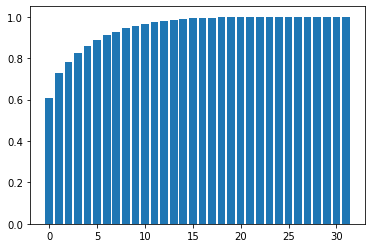

In [ ]:
pca = PCA()
pca_data = pca.fit_transform(X_scaled)
ev = pca.explained_variance_ratio_
plt.bar(np.arange(32),ev.cumsum())

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

import statsmodels.formula.api as smf
import statsmodels.api as sm

In [ ]:
pca10 = PCA(10)
X_p = pca10.fit_transform(X_scaled)

model = LinearRegression()
model.fit(X_p,mg_noIBX['exits_weekday_morning'])
cross_val_score(model,X_p,mg_noIBX['exits_weekday_morning'])

array([ 0.37541254,  0.21738344,  0.54624821, -0.79722387, -0.33342577])

In [ ]:
mg_noIBX['exits_weekday_evening']

0      10926.175
1      47538.800
2       8016.600
3       6610.825
4       4562.675
         ...    
422     1721.500
423      811.075
424     3465.075
425     1280.000
426      644.725
Name: exits_weekday_evening, Length: 424, dtype: float64

In [ ]:
pca_model = sm.OLS(mg_noIBX['exits_weekday_morning'],sm.add_constant(X_p)).fit()
print(pca_model.summary())

                              OLS Regression Results                             
Dep. Variable:     exits_weekday_morning   R-squared:                       0.599
Model:                               OLS   Adj. R-squared:                  0.589
Method:                    Least Squares   F-statistic:                     61.69
Date:                   Wed, 27 Apr 2022   Prob (F-statistic):           1.16e-75
Time:                           20:35:35   Log-Likelihood:                -4070.6
No. Observations:                    424   AIC:                             8163.
Df Residuals:                        413   BIC:                             8208.
Df Model:                             10                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3376.2368 

In [ ]:
model = sm.OLS(mg_noIBX['exits_weekday_morning'],sm.add_constant(X_scaled)).fit()
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     exits_weekday_morning   R-squared:                       0.703
Model:                               OLS   Adj. R-squared:                  0.681
Method:                    Least Squares   F-statistic:                     32.12
Date:                   Wed, 27 Apr 2022   Prob (F-statistic):           9.48e-86
Time:                           20:35:35   Log-Likelihood:                -4007.1
No. Observations:                    424   AIC:                             8074.
Df Residuals:                        394   BIC:                             8196.
Df Model:                             29                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3376.2368 